### CreatiLayout
We use the YOLO-v11-x [29] to validate the model’s layout adherence by detecting objects in the generated images and then calculating AP, AP50, and AR against the ground truth. We use IR [75], Pick [32], FID, CLIP, and IS to measure the global quality.

In [19]:
# 이미지 품질 점수 비교: 참가자별, 시스템별 rating이 가장 높은 행만 남기기
import pandas as pd

# YOLO 점수 (최고 rating만 남김)
yolo_df = pd.read_csv('result/image_score/image_rating_yolo.csv')
yolo_max = yolo_df.loc[yolo_df.groupby(['participant', 'system'])['rating'].idxmax()]
print('YOLO: 참가자별, 시스템별 최고 rating')
print(yolo_max[['participant', 'system', 'ap_score', 'ap50_score', 'ar_score']])

# IR 점수 (최고 rating만 남김)
ir_df = pd.read_csv('result/image_score/image_rating_ir.csv')
ir_max = ir_df.loc[ir_df.groupby(['participant', 'system'])['rating'].idxmax()]
print('\nIR: 참가자별, 시스템별 최고 rating')
print(ir_max[['participant', 'system', 'ir_score']])

# Pick 점수 (최고 rating만 남김)
pick_df = pd.read_csv('result/image_score/image_rating_pick.csv')
pick_max = pick_df.loc[pick_df.groupby(['participant', 'system'])['rating'].idxmax()]
print('\nPick: 참가자별, 시스템별 최고 rating')
print(pick_max[['participant', 'system', 'pick_score']])

YOLO: 참가자별, 시스템별 최고 rating
   participant   system  ap_score  ap50_score  ar_score
0           P1  system1  0.175824    0.175824  0.571429
4           P1  system2  0.222222    0.222222  0.500000
72         P10  system1  0.023810    0.023810  0.142857
74         P10  system2  0.187500    0.187500  0.375000
15         P11  system1  0.400000    0.400000  0.500000
9          P11  system2  0.457143    0.457143  0.571429
18         P12  system1  0.028571    0.028571  0.142857
17         P12  system2  0.017857    0.017857  0.125000
81          P2  system1  0.142857    0.142857  0.428571
78          P2  system2  0.140625    0.140625  0.375000
20          P3  system1  0.000000    0.000000  0.000000
23          P3  system2  0.257143    0.257143  0.428571
28          P4  system1  0.038462    0.038462  0.250000
30          P4  system2  0.114286    0.114286  0.285714
44          P5  system1  0.025000    0.025000  0.125000
34          P5  system2  0.035714    0.035714  0.142857
51          P6  syste

In [12]:
ir_max.groupby(['system'])[['ir_score']].mean().reset_index()


,system,ir_score
0,system1,0.872024
1,system2,0.696429


In [13]:
pick_max.groupby(['system'])[['pick_score']].mean().reset_index()

,system,pick_score
0,system1,824.875005
1,system2,847.603827


In [27]:
from scipy.stats import ttest_ind

key = 'ap_score'
# system별로 분리
sys1 = yolo_max[yolo_df['system'] == 'system1'][key]
sys2 = yolo_max[yolo_df['system'] == 'system2'][key]

# t-test 수행
t_stat, p_value = ttest_ind(sys1, sys2, nan_policy='omit')
print('t-test 결과: p-value =', p_value)

t-test 결과: p-value = 0.22778060642157483


/var/folders/yy/wmmdvn295kn5535yf3g57f2m0000gn/T/ipykernel_85712/1891761493.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sys1 = yolo_max[yolo_df['system'] == 'system1'][key]
/var/folders/yy/wmmdvn295kn5535yf3g57f2m0000gn/T/ipykernel_85712/1891761493.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sys2 = yolo_max[yolo_df['system'] == 'system2'][key]


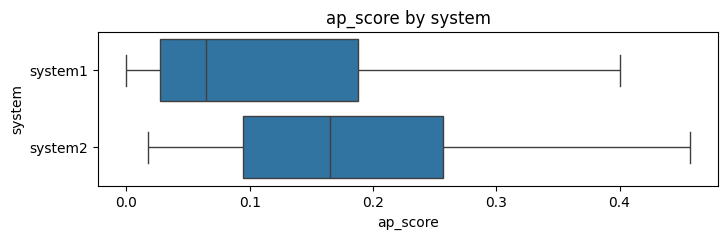

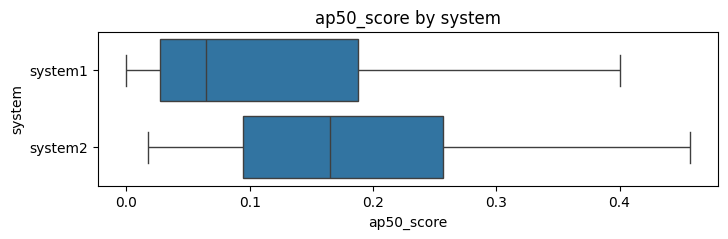

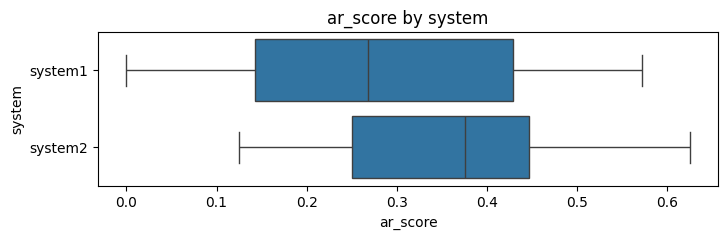

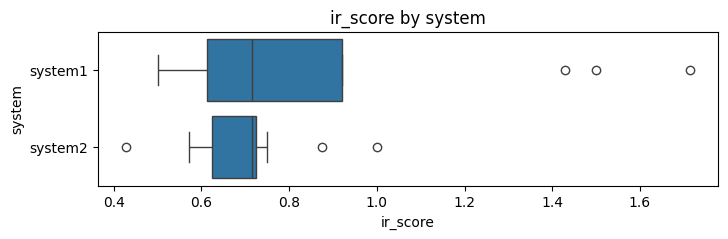

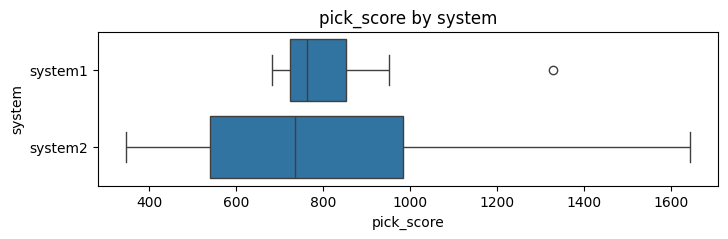

In [35]:
# 시스템별 box plot 시각화 (가로 boxplot)
import matplotlib.pyplot as plt
import seaborn as sns

# ap_score boxplot (가로)
plt.figure(figsize=(8, 2))
sns.boxplot(y='system', x='ap_score', data=yolo_max, orient='h')
plt.title('ap_score by system')
plt.show()

# ap50_score boxplot (가로)
plt.figure(figsize=(8, 2))
sns.boxplot(y='system', x='ap50_score', data=yolo_max, orient='h')
plt.title('ap50_score by system')
plt.show()

# ar_score boxplot (가로)
plt.figure(figsize=(8, 2))
sns.boxplot(y='system', x='ar_score', data=yolo_max, orient='h')
plt.title('ar_score by system')
plt.show()


plt.figure(figsize=(8, 2))
sns.boxplot(y='system', x='ir_score', data=ir_max, orient='h')
plt.title('ir_score by system')
plt.show()


plt.figure(figsize=(8, 2))
sns.boxplot(y='system', x='pick_score', data=pick_max, orient='h')
plt.title('pick_score by system')
plt.show()
